In [16]:
import pandas as pd
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
print(df["target"].value_counts())  # Check balance of classes

target
1    165
0    138
Name: count, dtype: int64


In [5]:
X = df[['age' , 'sex' ,'cp','trestbps','chol','fbs' ,'restecg','thalach','exang','oldpeak','slope','ca','thal']]
Y = df.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
x_train , x_test , y_train , y_test = train_test_split(X_scaled,Y,test_size = 0.2 , random_state = 42)

In [7]:
model = linear_model.LogisticRegression(max_iter=1000)  # max_iter to ensure convergence
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
y_pred = model.predict(x_test)

In [11]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

Confusion Matrix:
 [[25  4]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



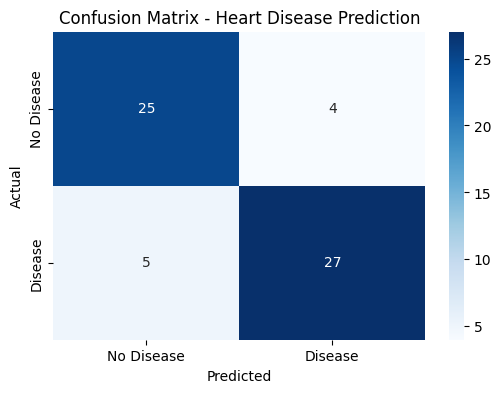

In [17]:
cm = metrics.confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Heart Disease Prediction')
plt.show()